In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
plt.style.use("fivethirtyeight")

In [340]:
data = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [341]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [342]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [343]:
data.shape

(7043, 21)

In [344]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [345]:
data.groupby('Churn')[['MonthlyCharges', 'tenure']].agg(['min', 'max', 'mean'])

MonthlyCharges                    tenure               
                 min     max       mean    min max       mean
Churn                                                        
No             18.25  118.75  61.265124      0  72  37.569965
Yes            18.85  118.35  74.441332      1  72  17.979133

TotalCharges columns has numeric values but looks object type.

In [346]:
data[data['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [347]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)

In [348]:
data[data['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [349]:
data['TotalCharges'].isna().sum()

11

In [350]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [351]:
data['TotalCharges'].dtypes

dtype('float64')

In [352]:
data.groupby('Churn')[['MonthlyCharges', 'tenure', 'TotalCharges']].agg(['min', 'max', 'mean'])

MonthlyCharges                    tenure                TotalCharges  \
                 min     max       mean    min max       mean          min   
Churn                                                                        
No             18.25  118.75  61.265124      0  72  37.569965        18.80   
Yes            18.85  118.35  74.441332      1  72  17.979133        18.85   

                             
           max         mean  
Churn                        
No     8672.45  2555.344141  
Yes    8684.80  1531.796094

Since, we have 11 null values in dataset, either we can fill them, or remove them. 11 is a low number, so I will drop them.

In [353]:
data.dropna(inplace = True)

In [354]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [355]:
data.shape

(7032, 21)

In [356]:
data.groupby('Churn')[['OnlineBackup', 'OnlineSecurity', 'PhoneService']].count()

,OnlineBackup,OnlineSecurity,PhoneService
Churn,,,
No,5163,5163,5163
Yes,1869,1869,1869


In [423]:
def half_corr_heatmap(data, title=None):
    plt.figure(figsize=(9,9))
    sns.set(font_scale=1)

    mask = np.zeros_like(data.corr())
    mask[np.tril_indices_from(mask)] = True

    with sns.axes_style("white"):
        sns.heatmap(data.corr(), mask=mask, annot=True, cmap="coolwarm")

    if title: plt.title(f"\n{title}\n", fontsize=10)
    plt.show()
    return

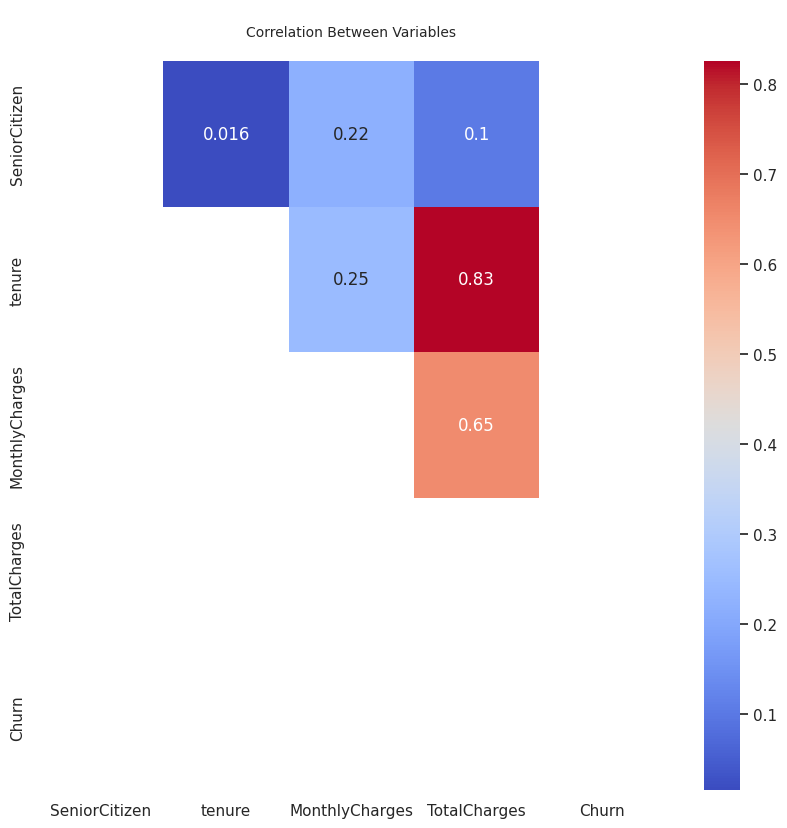

In [425]:
half_corr_heatmap(data, 'Correlation Between Variables')
figsize = (5, 5)

**Churn columns is not there because its dtype is object. Converting objects into a numeric.**

In [420]:
data['Churn'] = data['Churn'].map({'Yes' : 1, 'No' : 0})

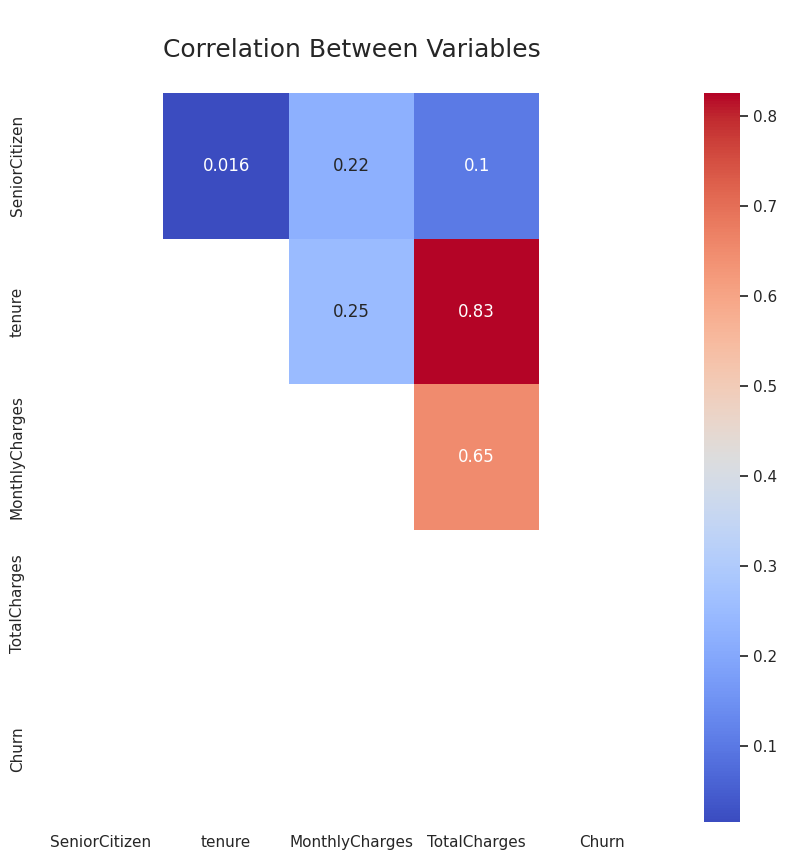

In [422]:
half_corr_heatmap(data, 'Correlation Between Variables' )


In [415]:
def corr_for_target(data, target, title=None):
    plt.figure(figsize=(5,4))
    sns.set(font_scale=1)

    sns.heatmap(data.corr()[[target]].sort_values(target, ascending=False)[1:], annot=True, cmap="coolwarm",)

    if title: plt.title(f"\n{title}\n", fontsize=18)
    return

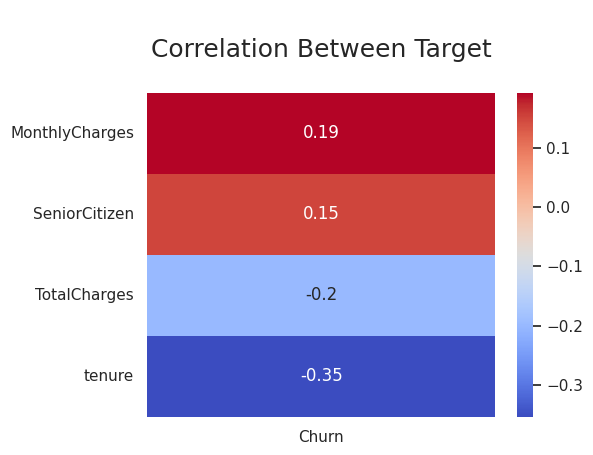

In [416]:
corr_for_target(data, 'Churn', 'Correlation Between Target')

In [365]:
data2 = data.drop(['customerID'], axis = 1)

To observe numerical, and numeric columns:

In [366]:
numerical = data2.select_dtypes(['number']).columns
print(f'Numerical: {numerical}\n')

categorical = data2.columns.difference(numerical)

data2[categorical] = data2[categorical].astype('object')
print(f'Categorical: {categorical}')

Numerical: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

Categorical: Index(['Contract', 'Dependents', 'DeviceProtection', 'InternetService',
       'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling',
       'Partner', 'PaymentMethod', 'PhoneService', 'StreamingMovies',
       'StreamingTV', 'TechSupport', 'gender'],
      dtype='object')


Creating ones, and zeros from categorical variables:

In [367]:
data2 = pd.get_dummies(data2)

In [368]:
data2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


Checking unique values of every column:

In [369]:
data_cols = data.drop('customerID', axis = 1)

for col in data_cols.columns:
    print(col, "\n")
    print(data[col].unique(), "\n")

gender 

['Female' 'Male'] 

SeniorCitizen 

[0 1] 

Partner 

['Yes' 'No'] 

Dependents 

['No' 'Yes'] 

tenure 

[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

PhoneService 

['No' 'Yes'] 

MultipleLines 

['No phone service' 'No' 'Yes'] 

InternetService 

['DSL' 'Fiber optic' 'No'] 

OnlineSecurity 

['No' 'Yes' 'No internet service'] 

OnlineBackup 

['Yes' 'No' 'No internet service'] 

DeviceProtection 

['No' 'Yes' 'No internet service'] 

TechSupport 

['No' 'Yes' 'No internet service'] 

StreamingTV 

['No' 'Yes' 'No internet service'] 

StreamingMovies 

['No' 'Yes' 'No internet service'] 

Contract 

['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling 

['Yes' 'No'] 

PaymentMethod 

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges 

[29

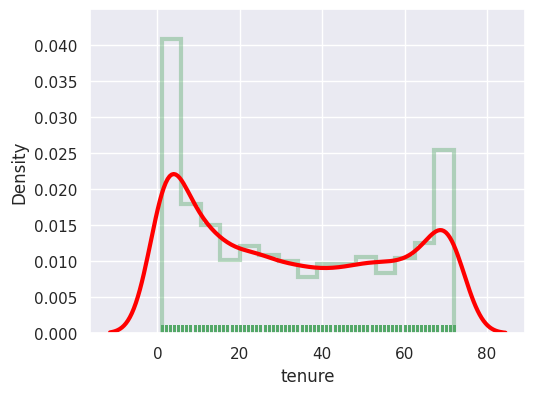

In [414]:
plt.figure(figsize = (5,4))

ax = sns.distplot(data['tenure'], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "red", "lw": 3},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 0.4, "color": "g"});

### There are people staying with this company for about 70 years.

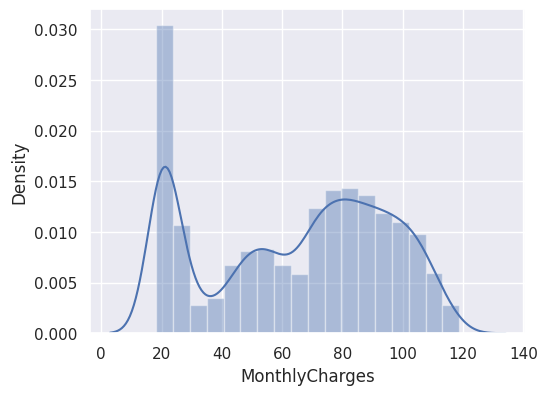

In [413]:
plt.figure(figsize=(5,4))

sns.distplot(data['MonthlyCharges']);

### Most of the customer has low monthly charge.

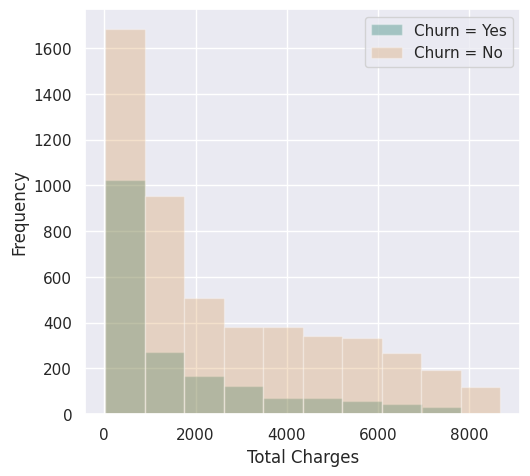

In [412]:
data[data['Churn'] == 1].TotalCharges.plot(kind = 'hist', alpha = 0.3, color = '#016a55', label = 'Churn = Yes',figsize = (5, 5))

data[data['Churn'] == 0].TotalCharges.plot(kind = 'hist', alpha = 0.3, color = '#d89955', label = 'Churn = No')

plt.xlabel('Total Charges')
plt.legend();

### Those with lower total charges have left the brand most.

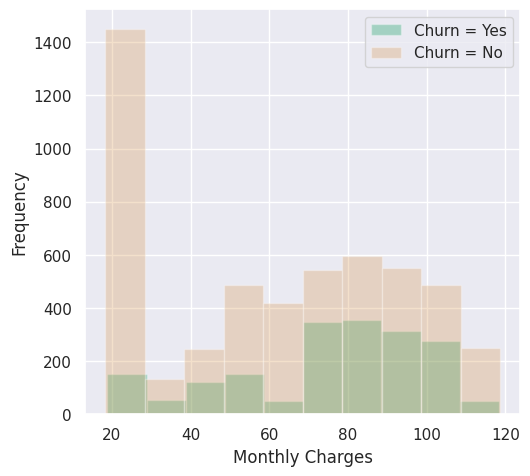

In [411]:
data[data['Churn'] == 1].MonthlyCharges.plot(kind = 'hist', alpha = 0.3, color = '#019955', label = 'Churn = Yes',figsize = (5, 5))

data[data['Churn'] == 0].MonthlyCharges.plot(kind = 'hist', alpha = 0.3, color = '#d89955', label = 'Churn = No')

plt.xlabel('Monthly Charges')
plt.legend();

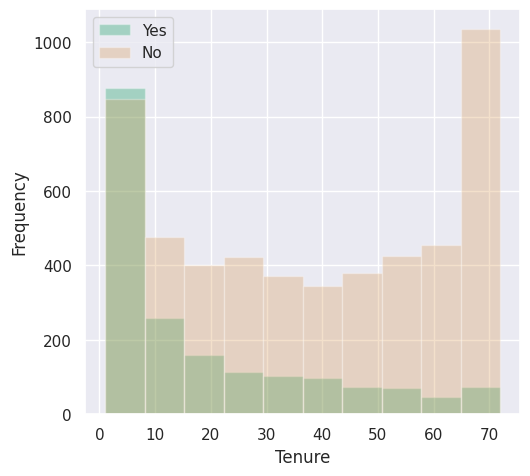

In [410]:
data[data['Churn'] == 1].tenure.plot(kind = 'hist', alpha = 0.3, color = '#019955', label = 'Yes',figsize = (5, 5))

data[data['Churn'] == 0].tenure.plot(kind = 'hist', alpha = 0.3, color = '#d89955', label = 'No')

plt.xlabel('Tenure')
plt.legend();

### Splitting the Data

In [375]:
X = data2.drop('Churn', axis=1)

y = data2['Churn']

# Model Building

In [376]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [377]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 33)

In [378]:
models = []
models.append(('Random Forest Clas.', RandomForestClassifier()))
models.append(('Decision Tree Clas.', DecisionTreeClassifier()))
models.append(('Logistic Reg.', LogisticRegression()))
models.append(('SVC', SVC()))

Creating a for loop to see cross validation scores for every model above:

In [379]:
model_names = []
scores = []

for name, model in models:
    score = cross_val_score(model, X, y, cv = 5, scoring='accuracy')
    scores.append(score)
    model_names.append(name)
    print(f"Mean of the {name} model scores : {score.mean()}")

Mean of the Random Forest Clas. model scores : 0.7861196961746844
Mean of the Decision Tree Clas. model scores : 0.7246862618425856
Mean of the Logistic Reg. model scores : 0.80446406455833
Mean of the SVC model scores : 0.7342150252598014


# Logistic Regression

In [380]:
log = LogisticRegression()
log.fit(X_train, y_train)

log_y_pred = log.predict(X_test)
log_y_pred_train = log.predict(X_train)

In [381]:
log_test_as = metrics.accuracy_score(log_y_pred, y_test)
log_train_as = metrics.accuracy_score(log_y_pred_train, y_train)

In [382]:
print(f"Accuracy score for test data : {log_test_as}")
print(f"Accuracy score for train data : {log_train_as}")

Accuracy score for test data : 0.7983627746660922
Accuracy score for train data : 0.8093822967522819


In [383]:
print(metrics.classification_report(log_y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1826
           1       0.52      0.64      0.57       495

    accuracy                           0.80      2321
   macro avg       0.71      0.74      0.72      2321
weighted avg       0.82      0.80      0.81      2321



In [384]:
metrics.confusion_matrix(log_y_pred, y_test)

array([[1538,  288],
       [ 180,  315]])

In [385]:
metrics.confusion_matrix(log_y_pred_train, y_train)

array([[3094,  547],
       [ 351,  719]])

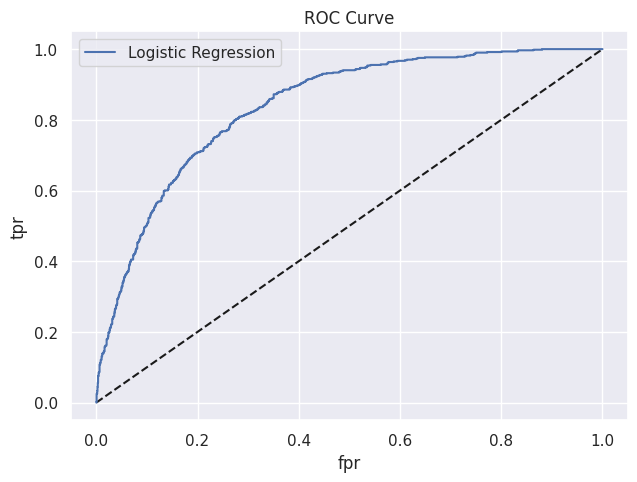

In [408]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.legend();

In [388]:
metrics.roc_auc_score(y_test, y_proba_log)

0.8388837728316122

In [389]:
y_proba_log_train = log.predict_proba(X_train)[:, 1]
metrics.roc_auc_score(y_train, y_proba_log_train)

0.8498265453286467

# SVC

In [390]:
y_pred_svc = svc.predict(X_test)
y_pred_train = svc.predict(X_train)

svc_train_as = metrics.accuracy_score(y_train, y_pred_train)
svc_as = metrics.accuracy_score(y_test, y_pred_svc)

In [391]:
print(f"Accuracy score for test data : {svc_as}")
print(f"Accuracy score for train data : {svc_train_as}")

Accuracy score for test data : 0.7401981904351572
Accuracy score for train data : 0.7312672468690299


In [392]:
print(metrics.classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1718
           1       0.00      0.00      0.00       603

    accuracy                           0.74      2321
   macro avg       0.37      0.50      0.43      2321
weighted avg       0.55      0.74      0.63      2321



Let's try after scaling the data.

In [393]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [394]:
svc_sc = SVC()
svc_sc.fit(X_train_sc, y_train)

y_pred_sc = svc_sc.predict(X_test_sc)
y_pred_sc_train = svc_sc.predict(X_train_sc)

svc_sc_train_as = metrics.accuracy_score(y_train, y_pred_sc_train)
svc_sc_as = metrics.accuracy_score(y_test, y_pred_sc)

In [395]:
print(f"Accuracy score for test data : {svc_sc_as}")
print(f"Accuracy score for train data : {svc_sc_train_as}")

Accuracy score for test data : 0.7914691943127962
Accuracy score for train data : 0.826151560178306


In [396]:
params = {'kernel' : ['rbf'], 'C' : [0.1, 1, 5, 10], 'gamma' : [0.01, 0.1, 0.9, 1]}

grid = GridSearchCV(SVC(), params, cv = 5, return_train_score= False)

Model tunning with the best params.

In [397]:
# svc_new = SVC(**grid.best_params_)
svc_new = SVC(C = 1, gamma = 0.01, kernel = 'rbf')
svc_new.fit(X_train_sc, y_train)

y_pred_new = svc_new.predict(X_test_sc)
y_pred_new_train = svc_new.predict(X_train_sc)

svc_new_train_as = metrics.accuracy_score(y_train, y_pred_new_train)
svc_new_as = metrics.accuracy_score(y_test, y_pred_new)

print(f"Accuracy score for test data : {svc_new_as}")
print(f"Accuracy score for train data : {svc_new_train_as}")

Accuracy score for test data : 0.7949159844894442
Accuracy score for train data : 0.8170239864147739


# Decision tree


In [398]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)
y_pred_train_dt = decision_tree.predict(X_train)

In [399]:
dt_as = metrics.accuracy_score(y_test, y_pred_dt)
dt_as_train = metrics.accuracy_score(y_train, y_pred_train_dt)

print(f"Accuracy score for test data : {dt_as}")
print(f"Accuracy score for train data : {dt_as_train}")

Accuracy score for test data : 0.7233950883239982
Accuracy score for train data : 0.9983018467416684


# Random Forest Classifier

In [400]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)
y_pred_train_rf = random_forest.predict(X_train)

In [401]:
rf_as = metrics.accuracy_score(y_test, y_pred_rf)
rf_as_train = metrics.accuracy_score(y_train, y_pred_train_rf)

print(f"Accuracy score for test data : {rf_as}")
print(f"Accuracy score for train data : {rf_as_train}")

Accuracy score for test data : 0.7884532529082292
Accuracy score for train data : 0.9983018467416684


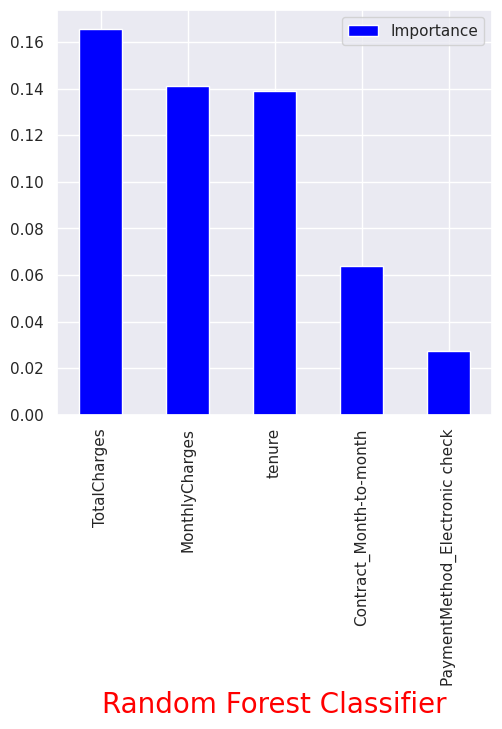

In [429]:
feature_importance_ = pd.DataFrame({'Importance' : RandomForestClassifier().fit(X, y).feature_importances_}, index = X.columns)

feature_importance_.sort_values(by = 'Importance', ascending = False, axis = 0)[:5].plot(kind = 'bar', color = 'blue', figsize = (5, 5))
plt.xlabel("Random Forest Classifier", color = "red", fontdict= {"fontsize" : 20});

***Let's try with gridsearchcv to find best parameters.***

In [403]:
params_grid = {'criterion' : ['entropy', 'gini'], 'max_depth' : [2, 4, 6, 8], 'n_estimators' : [300, 400, 500],
              'min_samples_split' : [2, 4, 6, 8], 'min_samples_leaf' : [2, 3, 5, 7]}

gscv_rf = GridSearchCV(RandomForestClassifier(), params_grid, cv = 3, scoring = 'f1')
# gscv_rf.fit(X_train_sc, y_train)

In [404]:
# gscv_rf.best_params_
# {'criterion': 'gini','max_depth': 8,'min_samples_leaf': 2,'min_samples_split': 8,'n_estimators': 400}

In [405]:
# model tunning with best parameters

rf_gscv =RandomForestClassifier(n_estimators = 400, criterion = 'gini', max_depth = 8, min_samples_split = 8, min_samples_leaf = 2)
rf_gscv.fit(X_train_sc, y_train)

y_pred_gsvc = rf_gscv.predict(X_test_sc)
y_pred_gsvc_train = rf_gscv.predict(X_train_sc)

rf_gscv_as = metrics.accuracy_score(y_test, y_pred_gsvc)
rf_gscv_train_as = metrics.accuracy_score(y_train, y_pred_gsvc_train)

print(f"Accuracy score for test data : {rf_gscv_as}")
print(f"Accuracy score for train data : {rf_gscv_train_as}")

Accuracy score for test data : 0.7936234381732012
Accuracy score for train data : 0.8357036722564212
